In [52]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

In [9]:
sp = pd.read_csv('data/S&P 500 Historical Data.csv')
sp = sp.set_index('Date')
sp.index = pd.to_datetime(sp.index)
close_price = np.asarray(sp['19950515':'20030424']['Close'])

dr2000 = (close_price[1:] - close_price[:2000]) / close_price[:2000]

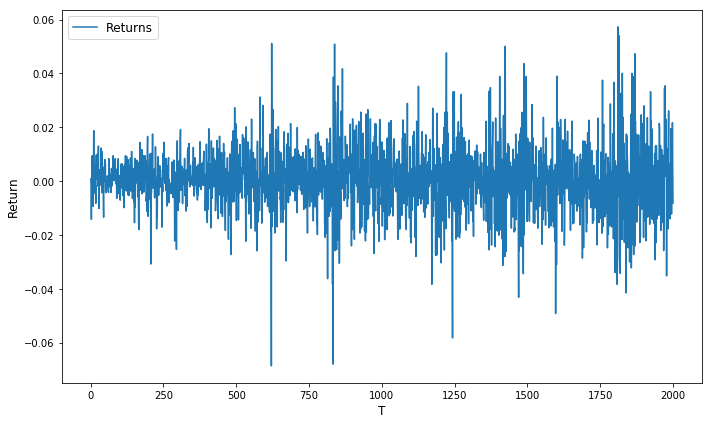

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(dr2000)+1), dr2000, label='Returns')
plt.xlabel('T', fontsize=12)
plt.ylabel('Return', fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('image/sv_return_sp.png')
plt.show()

In [17]:
quantiles8 = np.array(pd.read_csv('result_txt/quantiles_sd_rho8.txt', header=None))

In [19]:
Qs = [0.05, 0.25, 0.5, 0.75, 0.95]

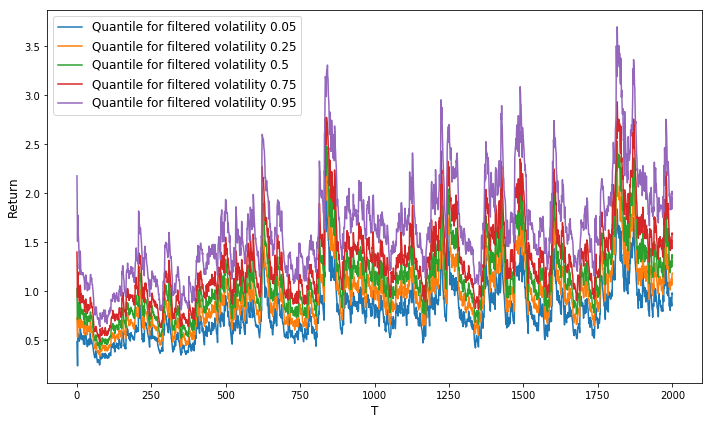

In [26]:
plt.figure(figsize=(10, 6))
for i in range(5):
    plt.plot(np.arange(1, len(dr2000)+1), quantiles8[:, i], label='Quantile for filtered volatility {}'.format(Qs[i]))
plt.xlabel('T', fontsize=12)
plt.ylabel('Return', fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('image/sv_quantile_sp8.png')
plt.show()

In [57]:
u8 = np.array(pd.read_csv('result_txt/u_t_rho8.txt', header=None))[:, 0]

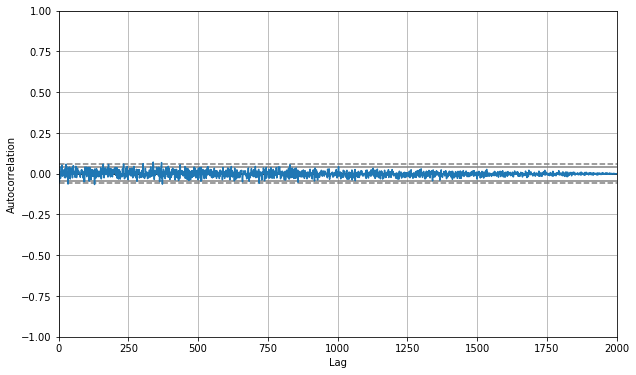

In [59]:
from pandas.plotting import autocorrelation_plot

plt.figure(figsize=(10, 6))
s = autocorrelation_plot(u8)
plt.savefig('image/acf_rho8.png')

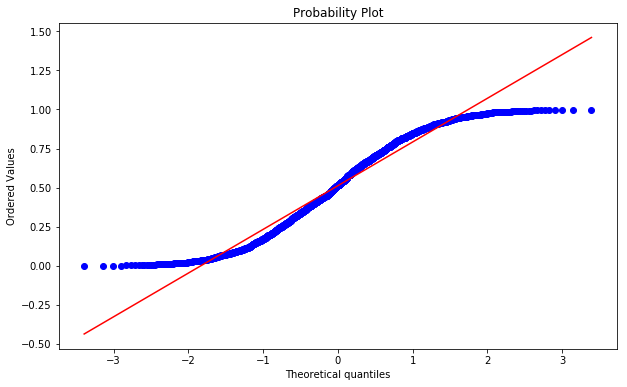

In [60]:
plt.figure(figsize=(10, 6))
res = stats.probplot(u8, plot=plt)
plt.show()